In [70]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Rule Level Data

In [104]:
rules = pd.read_csv("../output_data/seth/all_fields_data.csv")
rules.sort_values(by=["communityID", "ruleID"], inplace=True)

In [105]:
rules.head(5)

,name_change_type,description_change_type,violation_change_type,date_observed,timestamp_rule,communityID,ref,ruleID,rule_age_in_days
9252,unchanged,unchanged,never_present,2021-04-23 00:00:00,2021-04-01,0ne_0f_us,https://www.reddit.com/r/0ne_0f_us/,0ne_0f_us_0,22
11862,unchanged,unchanged,never_present,2021-04-23 00:00:00,2021-03-01,100waysto,https://www.reddit.com/r/100waysto/,100waysto_0,53
11863,unchanged,unchanged,never_present,2021-04-23 00:00:00,2021-03-01,100waysto,https://www.reddit.com/r/100waysto/,100waysto_1,53
11864,unchanged,unchanged,never_present,2021-04-23 00:00:00,2021-03-01,100waysto,https://www.reddit.com/r/100waysto/,100waysto_2,53
3221,unchanged,unchanged,never_present,2021-04-23 00:00:00,2021-04-01,100xcoin,https://www.reddit.com/r/100xcoin/,100xcoin_0,22


# Hypothesis Testing

## H: the older the rule, the more likely it is to be deleted

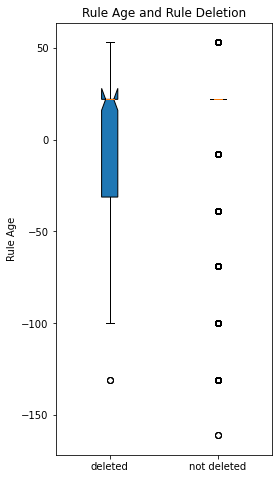

In [110]:
#    boxplot of age of rules that present at both time periods
#     boxplot of age of rules that only present at the first time period
in_both_snaps = rules[(rules.name_change_type != 'deleted') & (rules.name_change_type != 'added')]
# Creating dataset
deleted = np.array(rules[rules.name_change_type == 'deleted'].rule_age_in_days)
not_deleted = np.array(in_both_snaps.rule_age_in_days)

data = np.array([deleted, not_deleted], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,
                 notch=True,  # notch shape
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=['deleted', 'not deleted'])  # will be used to label x-ticks

plt.ylabel("Rule Age")
plt.title("Rule Age and Rule Deletion")

# show plot
plt.show()

## H: the older the rule, the more likely it is to be added

# Sub Level Data

In [107]:
agg_data = pd.DataFrame(rules[['communityID', 'name_change_type']].groupby(['communityID', 'name_change_type']).agg(len)).reset_index()
agg_data = agg_data.pivot(index='communityID', columns='name_change_type', values=0).fillna(0).reset_index()
sub_metadata = pd.read_csv("../output_data/seth/sub_metadata.csv")
sub_metadata = agg_data.set_index('communityID').join(sub_metadata.set_index('communityID'), on=['communityID'])
sub_metadata = sub_metadata.reset_index()
sub_metadata['age_in_months'] = \
    (pd.to_datetime('2021-04-23') - pd.to_datetime(sub_metadata['founding_date'] * 10**9))/ np.timedelta64(1, 'M')
sub_metadata

,communityID,added,changed,deleted,unchanged,subscribers_1,subscribers_2,rules_1,rules_2,founding_date,age_in_months
0,0ne_0f_us,0.0,0.0,0.0,1.0,9,9,1,1,1.618169e+09,0.367704
1,100waysto,0.0,0.0,0.0,3.0,3,3,3,3,1.617180e+09,0.743731
2,100xcoin,0.0,0.0,0.0,7.0,12667,14013,7,7,1.617505e+09,0.620121
3,14x14,0.0,0.0,0.0,1.0,1,15,1,1,1.617822e+09,0.499537
4,180gameplaybannypro,0.0,0.0,0.0,1.0,6,6,1,1,1.617916e+09,0.463958
...,...,...,...,...,...,...,...,...,...,...,...
3073,zone8gardening,0.0,0.0,0.0,4.0,20,53,4,4,1.617749e+09,0.527567
3074,zoomiestoken,0.0,0.0,0.0,4.0,148,143,4,4,1.618574e+09,0.213581
3075,zoosandaquariums,0.0,0.0,0.0,3.0,3,3,3,3,1.616605e+09,0.962436
3076,zumpaxd,0.0,0.0,0.0,1.0,5,5,1,1,1.617699e+09,0.546263


# Hypothesis Testing-- Sub Size

## Punctuated Eq Scatterplot

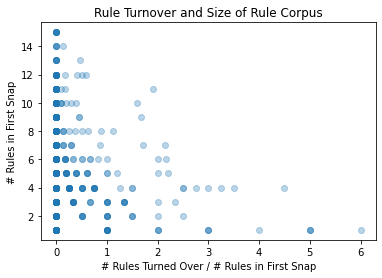

In [78]:
x = np.array((sub_metadata.added + sub_metadata.deleted + sub_metadata.changed)/sub_metadata.rules_1)
y = np.array(sub_metadata.rules_1)

# Plot the scatter plot with the calculated area
colors = np.random.rand(N)
plt.scatter(x, y, alpha=0.3)

plt.xlabel("# Rules Turned Over / # Rules in First Snap")
plt.ylabel("# Rules in First Snap")
plt.title("Rule Turnover and Size of Rule Corpus")

plt.show()

## H: The bigger the sub, the more likely that they will add >=1 rule

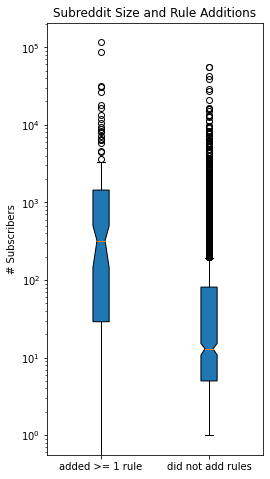

In [79]:
# Creating dataset
added = np.array(sub_metadata[sub_metadata.added > 0].subscribers_1)
not_added = np.array(sub_metadata[sub_metadata.added == 0].subscribers_1)
data = np.array([added, not_added], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,
                 notch=True,  # notch shape
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=['added >= 1 rule', 'did not add rules'])  # will be used to label x-ticks
plt.yscale("log")

plt.ylabel("# Subscribers")
plt.title("Subreddit Size and Adding a Rule")

# show plot
plt.show()

## H: the bigger the sub, the more rules they add

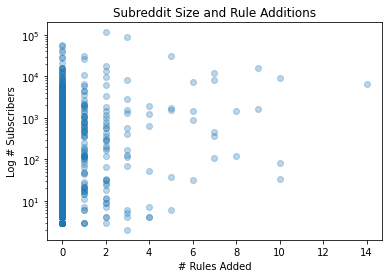

In [92]:
y = np.array(sub_metadata.subscribers_1 + 2)
x = np.array(sub_metadata.added)

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)
plt.yscale("log")

plt.ylabel("# Subscribers")
plt.xlabel("# Rules Added")
plt.title("Subreddit Size and Rule Additions")

plt.show()

## H: the bigger the sub, the more rules they add

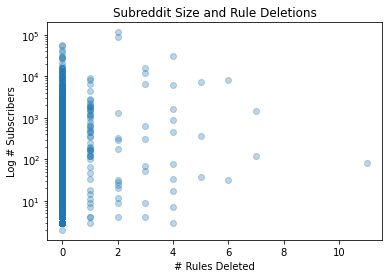

In [93]:
y = np.array(sub_metadata.subscribers_1 + 2)
x = np.array(sub_metadata.deleted)

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)
plt.yscale("log")

plt.ylabel("Log # Subscribers")
plt.xlabel("# Rules Deleted")
plt.title("Subreddit Size and Rule Deletions")

plt.show()

## H: The bigger the sub, the more likely they will delete >=1 rule

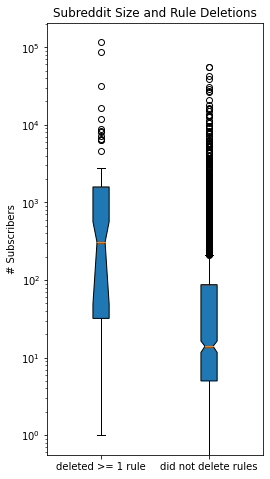

In [80]:
# Creating dataset
deleted = np.array(sub_metadata[sub_metadata.deleted > 0].subscribers_1)
not_deleted = np.array(sub_metadata[sub_metadata.deleted == 0].subscribers_1)
data = np.array([deleted, not_deleted], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,
                 notch=True,  # notch shape
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=['deleted >= 1 rule', 'did not delete rules'])  # will be used to label x-ticks
plt.yscale("log")

plt.ylabel("# Subscribers")
plt.title("Subreddit Size and Deleting a Rule")

# show plot
plt.show()

## H: the bigger the sub, the more total changes they will make

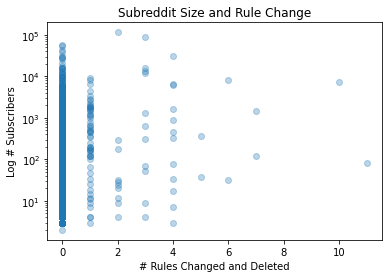

In [94]:
#     1 scatterplot x = #subscribers, y = sum(rules changed  + rules deleted)
y = np.array(sub_metadata.subscribers_1 + 2)
x = np.array(sub_metadata.deleted + sub_metadata.changed)

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)
plt.yscale("log")

plt.ylabel("Log # Subscribers")
plt.xlabel("# Rules Changed and Deleted")
plt.title("Subreddit Size and Rule Change")

plt.show()

# Hypothesis testing-- Sub Age

## H: the older the sub, the less likely that they will add a rule

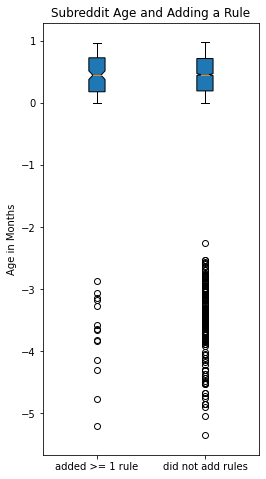

In [99]:
# Creating dataset
added = np.array(sub_metadata[sub_metadata.added > 0].age_in_months)
not_added = np.array(sub_metadata[sub_metadata.added == 0].age_in_months)
data = np.array([added, not_added], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,
                 notch=True,  # notch shape
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=['added >= 1 rule', 'did not add rules'])  # will be used to label x-ticks

plt.ylabel("Age in Months")
plt.title("Subreddit Age and Adding a Rule")

# show plot
plt.show()

## H: the older the sub, the fewer rules they add

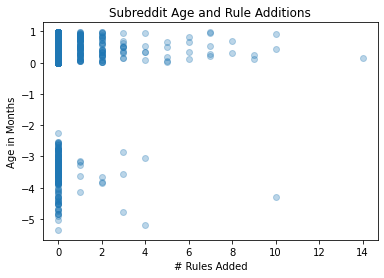

In [97]:
y = np.array(sub_metadata.age_in_months)
x = np.array(sub_metadata.added)

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

plt.ylabel("Age in Months")
plt.xlabel("# Rules Added")
plt.title("Subreddit Age and Rule Additions")

plt.show()

## H: the older the sub, the less likely that they will delete a rule

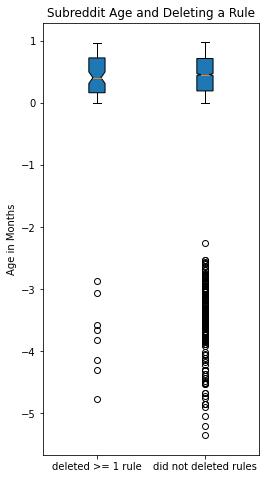

In [100]:
# Creating dataset
deleted = np.array(sub_metadata[sub_metadata.deleted > 0].age_in_months)
not_deleted = np.array(sub_metadata[sub_metadata.deleted == 0].age_in_months)
data = np.array([deleted, not_deleted], dtype=object)
 
fig = plt.figure(figsize =(3, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data,
                 notch=True,  # notch shape
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=['deleted >= 1 rule', 'did not deleted rules'])  # will be used to label x-ticks

plt.ylabel("Age in Months")
plt.title("Subreddit Age and Deleting a Rule")

# show plot
plt.show()

## H: the older the sub, the fewer rules they delete

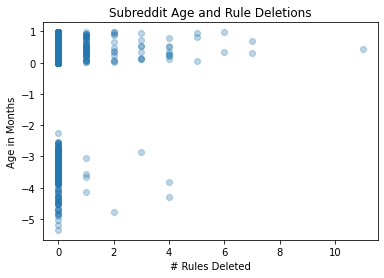

In [101]:
y = np.array(sub_metadata.age_in_months)
x = np.array(sub_metadata.deleted)

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

plt.ylabel("Age in Months")
plt.xlabel("# Rules Deleted")
plt.title("Subreddit Age and Rule Deletions")

plt.show()

## H: the older the sub, the fewer total changes they will make

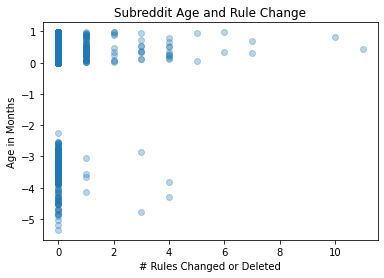

In [102]:
y = np.array(sub_metadata.age_in_months)
x = np.array(sub_metadata.deleted + sub_metadata.changed)

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

plt.ylabel("Age in Months")
plt.xlabel("# Rules Changed or Deleted")
plt.title("Subreddit Age and Rule Change")

plt.show()

# Hypothesis testing-- Initial Rules

## H: the more initial rules the sub has, the more likely they will delete rules

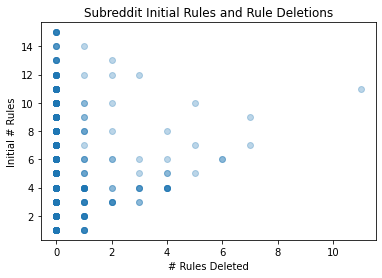

In [103]:
y = np.array(sub_metadata.rules_1)
x = np.array(sub_metadata.deleted)

# Plot the scatter plot with the calculated area
plt.scatter(x, y, alpha=0.3)

plt.ylabel("Initial # Rules")
plt.xlabel("# Rules Deleted")
plt.title("Subreddit Initial Rules and Rule Deletions")

plt.show()